In [6]:
#运行这个代码可以让Python不显示warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas
import geopandas as gpd
import pyproj

In [7]:
xinling = pd.read_csv(r'F:\\data\\扬州.csv',header=None,encoding='utf-8')#这样读取默认第一行是表头\n",
xinling   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,wtv1jyy,119.792862,32.557297,119.792175,32.557983,119.792175,32.556610,119.793549,32.557983,119.793549,32.556610,1000514,扬州市,321012,江都区
1,wtszd1y,119.276505,32.266159,119.275818,32.266846,119.275818,32.265472,119.277191,32.266846,119.277191,32.265472,1000514,扬州市,321081,仪征市
2,wtufxkb,119.498978,32.809982,119.498291,32.810669,119.498291,32.809296,119.499664,32.810669,119.499664,32.809296,1000514,扬州市,321084,高邮市
3,wtsxxsw,119.166641,32.281265,119.165955,32.281952,119.165955,32.280579,119.167328,32.281952,119.167328,32.280579,1000514,扬州市,321081,仪征市
4,wtv4cf0,119.608841,32.838821,119.608154,32.839508,119.608154,32.838135,119.609528,32.839508,119.609528,32.838135,1000514,扬州市,321084,高邮市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335323,wtuu7yv,119.352036,33.128586,119.351349,33.129272,119.351349,33.127899,119.352722,33.129272,119.352722,33.127899,1000514,扬州市,321023,宝应县
335324,wtuvntz,119.475632,33.254929,119.474945,33.255615,119.474945,33.254242,119.476318,33.255615,119.476318,33.254242,1000514,扬州市,321023,宝应县
335325,wtv1njb,119.795609,32.551804,119.794922,32.552490,119.794922,32.551117,119.796295,32.552490,119.796295,32.551117,1000514,扬州市,321012,江都区
335326,wtsz8rr,119.200974,32.296371,119.200287,32.297058,119.200287,32.295685,119.201660,32.297058,119.201660,32.295685,1000514,扬州市,321081,仪征市


In [8]:
xinling['区编号']=xinling.iloc[:,0]
xinling['经度']=xinling.iloc[:,1]
xinling['纬度']=xinling.iloc[:,2]

In [9]:
QSY=xinling.loc[:,['区编号','经度','纬度']]
QSY

,区编号,经度,纬度
0,wtv1jyy,119.792862,32.557297
1,wtszd1y,119.276505,32.266159
2,wtufxkb,119.498978,32.809982
3,wtsxxsw,119.166641,32.281265
4,wtv4cf0,119.608841,32.838821
...,...,...,...
335323,wtuu7yv,119.352036,33.128586
335324,wtuvntz,119.475632,33.254929
335325,wtv1njb,119.795609,32.551804
335326,wtsz8rr,119.200974,32.296371


In [10]:
line = pd.read_csv(r'F:\\data\\扬州公交\\line_5_6\\线路shp\\1001_line.csv',encoding='gbk')#默认第一行是表头

In [11]:
#-*-coding=utf-8 -*-\n",
import pyproj
import pandas as pd
import numpy as np
#data = pd.read_csv(\"test.csv\",sep=',',header='infer')#将第一行作为表头,
p1 = pyproj.Proj(init="epsg:4326")#wgs坐标系统的EPSG Code,
p2 = pyproj.Proj(init="epsg:32651")#UTM 51N坐标系统的EPSG Code\n",
lonprj2, latprj2 = pyproj.transform(p1, p2,line['LONGITUDE'], line['LATITUDE'])
lonprj3, latprj3 = pyproj.transform(p1, p2,QSY['经度'], QSY['纬度'])

In [12]:
##将数组转换为PD\n",
line['lons']=pd.DataFrame(lonprj2)
line['lats']=pd.DataFrame(latprj2)
QSY['lons']=pd.DataFrame(lonprj3)
QSY['lats']=pd.DataFrame(latprj3)

In [13]:
from shapely.geometry import Point
#对栅格GPS点生成点要素，并转换为一个GeoDataFrame，方便后续的地图匹配\n",
lon=QSY['lons']
lat=QSY['lats']
list=[]
for i in range(0,len(QSY)):
    g=Point(lon[i],lat[i])
    list.append(g)
    pass
list = gpd.GeoDataFrame(list)###转换为pd形式
QSY['geometry']=list
QSY['geometry']

0          POINT (198848.6170381246 3606749.1877728566)
1          POINT (149208.7872097168 3576028.4108419414)
2          POINT (172164.9988051047 3635653.2591072964)
3          POINT (138911.92657031235 3578069.665969615)
4           POINT (182560.4135107388 3638516.752935278)
                              ...                      
335323     POINT (159624.26312268496 3671468.904006002)
335324    POINT (171635.11672724423 3685091.1917552133)
335325    POINT (199088.27910198615 3606132.0775836003)
335326    POINT (142207.41093595064 3579630.4572813855)
335327    POINT (183553.18058406818 3673257.2436984773)
Name: geometry, Length: 335328, dtype: object

##生成站点的的点要素
lon=stop['lons']
lat=stop['lats']
stoplist=[]
for i in range(0,len(stop)):
    g=Point(lon[i],lat[i])
    stoplist.append(g)
    pass
stoplist = gpd.GeoDataFrame(stoplist)###转换为pd形式
list
stop['geometry']=stoplist
stop['geometry']

In [14]:
#生成线路的线要素
from shapely.geometry import LineString
dianlon=line['lons']
dianlat=line['lats']
dianlist=[]
for i in range(0,len(line)):
    g=(dianlon[i],dianlat[i])
    dianlist.append(g)
    pass
dianlist
linestr = LineString(dianlist)
line['geometry']=linestr
line['geometry']

0       LINESTRING (167542.42429840157 3586793.7239382...
1       LINESTRING (167542.42429840157 3586793.7239382...
2       LINESTRING (167542.42429840157 3586793.7239382...
3       LINESTRING (167542.42429840157 3586793.7239382...
4       LINESTRING (167542.42429840157 3586793.7239382...
                              ...                        
1553    LINESTRING (167542.42429840157 3586793.7239382...
1554    LINESTRING (167542.42429840157 3586793.7239382...
1555    LINESTRING (167542.42429840157 3586793.7239382...
1556    LINESTRING (167542.42429840157 3586793.7239382...
1557    LINESTRING (167542.42429840157 3586793.7239382...
Name: geometry, Length: 1558, dtype: object

In [15]:
#地图匹配
lineshp=line['geometry'].iloc[1]
QSY['project'] = QSY['geometry'].apply(lambda r:lineshp.project(r))
#原始的坐标点存储在一个字段中
QSY['geometry_orgin'] = QSY['geometry']
#生成匹配的坐标点
QSY['geometry'] = QSY['project'].apply(lambda r:lineshp.interpolate(r))###差值拟合匹配
QSY['project']

0           297.330269
1         18498.983322
2          9142.287404
3         18521.691136
4          7541.263942
              ...     
335323    15014.643153
335324     9175.433094
335325      297.330269
335326    18521.691136
335327     9142.287404
Name: project, Length: 335328, dtype: float64

In [16]:
#批量计算原始点和匹配点之间的距离
QSY['diff'] = QSY.apply(lambda r:r['geometry_orgin'].distance(r['geometry']),axis = 1)
QSY['diff']

0         37039.571075
1         14885.734394
2         46232.015868
3         20373.812239
4         51976.393253
              ...     
335323    80715.324705
335324    95137.431052
335325    36920.410032
335326    16773.024296
335327    85430.597233
Name: diff, Length: 335328, dtype: float64

In [17]:
#储存
QSY.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\NEW1001\QSY.csv',index=None)
#stop.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\stop.csv',index=None)
line.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\NEW1001\line.csv',index=None)

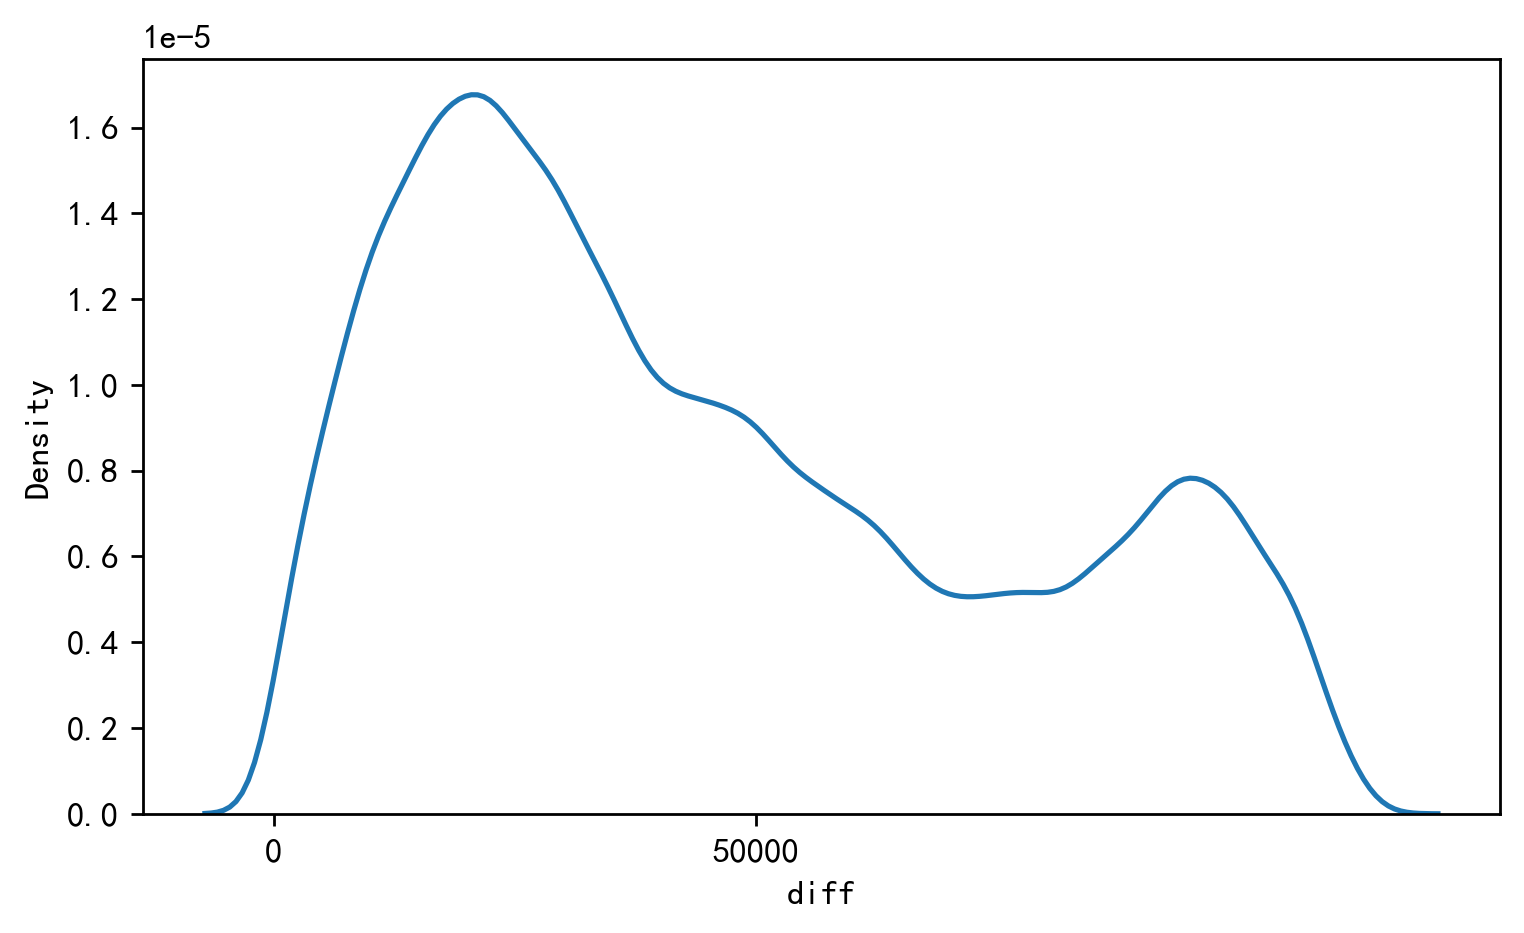

In [18]:
#绘制栅格到线路距离分布的核密度分布\
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)
sns.kdeplot(QSY[QSY['diff']<1000000]['diff'])

plt.xticks(range(0,100000,50000),range(0,100000,50000))##实际范围和标志，最后是步长\n",
plt.show()

以1路线为例，全市距离1路线最远的栅格在100km处，基本就是全市范围

In [19]:
QSY = pd.read_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\NEW1001\\QSY.csv',encoding='utf-8')#默认第一行是表头，所有栅格地图匹配后

In [20]:
lineQSY=QSY[QSY['diff']<300]##先将全市范围缩减到沿线300米以内，在此基础上，匹配栅格的最近站点

In [21]:
lineQSY.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\NEW1001\lineQSY300.csv',index=None)

In [22]:
lineQSY= pd.read_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\NEW1001\lineQSY300.csv',encoding='utf-8')#默认第一行是表头，所有栅格地图匹配后

import math
###将所有小区匹配到最近的站点上
#for k in range(0,len(lineQSY)):
match=[]
nearestd=[]
for k in range(0,len(lineQSY)):###range写法要求索引连续完整
    distance=[]
    for i in range(0,len(stop)):        
        x1 = stop.loc[i,'lons']
        y1 = stop.loc[i,'lats']
        x2 = lineQSY.loc[k,'lons']
        y2 = lineQSY.loc[k,'lats']
        #print(math.sqrt((x2-x1)**2+(y2-y1)**2))
        distance.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    #print(distance)
    #print(len(distance))
    # 求列表最小值及索引
    min_value = min(distance) # 求列表最小值
    min_idx = distance.index(min_value) # 求最小值对应索引
    #print(min_value)
    #print(min_idx )
    nearestd.append(min_value)
    match.append(min_idx)
###最近站点整理
lineQSY['最近站名索引']=match
lineQSY['最近站距离']=nearestd
lineQSY['最近站名']=None
lineQSY['最近站编号']=None
for k in range(0,len(lineQSY)):
    sy=lineQSY['最近站名索引'].loc[k]
    lineQSY['最近站名'].loc[k]=stop['STATIONNAME'].loc[sy]
    lineQSY['最近站编号'].loc[k]=stop['STATIONNO'].loc[sy]
lineQSY.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\lineQSY300.csv',index=None)

###最近站点整理
lineQSY['最近站名索引']=match
lineQSY['最近站距离']=nearestd
lineQSY['最近站名']=None
lineQSY['最近站编号']=None
for k in range(0,len(lineQSY)):
    sy=lineQSY['最近站名索引'].loc[k]
    lineQSY['最近站名'].loc[k]=stop['STATIONNAME'].loc[sy]
    lineQSY['最近站编号'].loc[k]=stop['STATIONNO'].loc[sy]
lineQSY

for k in range(0,len(lineQSY)):
    sy=lineQSY['最近站名索引'].loc[k]
    lineQSY['最近站名'].loc[k]=stop['STATIONNAME'].loc[sy]
    lineQSY['最近站编号'].loc[k]=stop['STATIONNO'].loc[sy]
lineQSY

In [58]:
lineQSY.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\lineQSY300.csv',index=None)

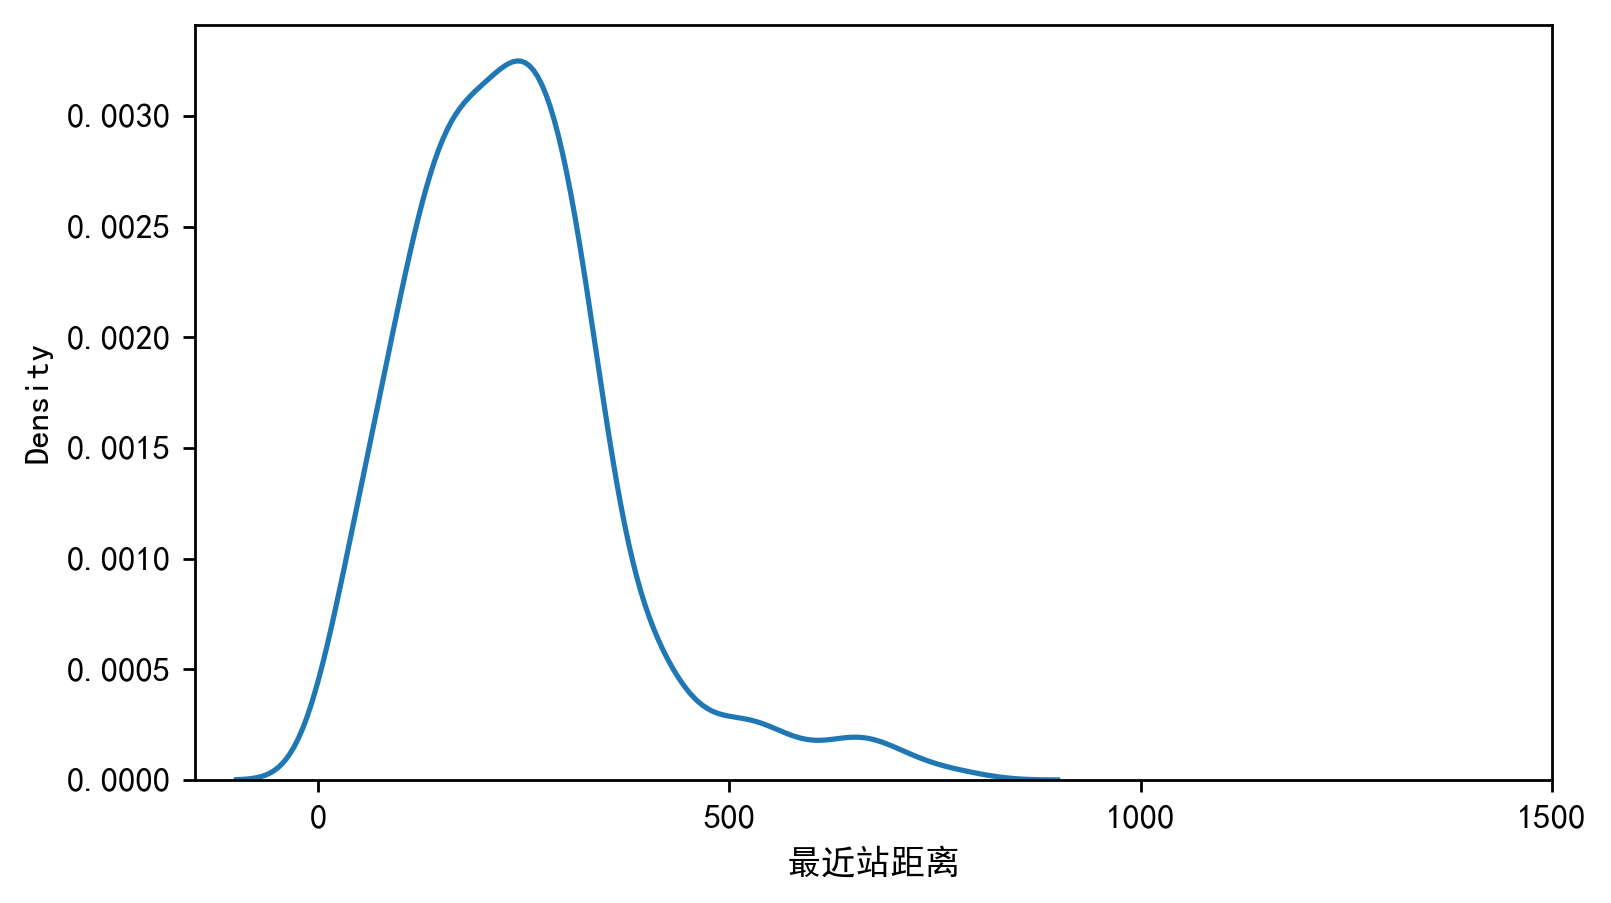

In [59]:
#绘制栅格到最近的站点的距离密度分布
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)   
ax1      = plt.subplot(111)
sns.kdeplot(lineQSY[lineQSY['最近站距离']<2000]['最近站距离'])
plt.xticks(range(0,2000,500),range(0,2000,500))##实际范围和标志，最后是步长
plt.show()
###沿线一公里内的栅格，距离最近的站点的距离大部分在在1500米以内

In [55]:
###切分时间字段
###筛选出这段时间内到达的栅格人群，线路
d=arrive['到达时间'].str.split('-',expand=True)
d['起始时间']=d.loc[:,[0]]
d['结束时间']=d.loc[:,[1]]
arrive['到达起始时间']=d['起始时间']
arrive['到达结束时间']=d['结束时间']
o=arrive['出发时间'].str.split('-',expand=True)
o['起始时间']=o.loc[:,[0]]
o['结束时间']=o.loc[:,[1]]
arrive['出发起始时间']=o['起始时间']
arrive['出发结束时间']=o['结束时间']
arrive

,日期,到达时间,D编号,人数,出发时间,O编号,FLAG,到达起始时间,到达结束时间,出发起始时间,出发结束时间
0,20210503,10:35-10:40,wtv08g5,4,09:00-09:05,wtv08fw,1.0,10:35,10:40,09:00,09:05
1,20210503,08:55-09:00,wtubmdt,66,07:30-07:35,wtuybnz,1.0,08:55,09:00,07:30,07:35
2,20210503,16:30-16:35,wttyjyh,2,13:10-13:15,wtubme6,1.0,16:30,16:35,13:10,13:15
3,20210503,23:15-23:20,wtubnf6,1,23:05-23:10,wtubnfd,1.0,23:15,23:20,23:05,23:10
4,20210503,17:10-17:15,wtv0h39,4,15:55-16:00,wtv0h39,1.0,17:10,17:15,15:55,16:00
...,...,...,...,...,...,...,...,...,...,...,...
3376561,20210503,17:25-17:30,wtv00rk,5,16:55-17:00,wtv00rv,1.0,17:25,17:30,16:55,17:00
3376562,20210503,19:00-19:05,wtubm0g,24,16:20-16:25,wtufqpu,1.0,19:00,19:05,16:20,16:25
3376563,20210503,12:35-12:40,wtubq4n,81,12:20-12:25,wtubmkv,1.0,12:35,12:40,12:20,12:25
3376564,20210503,16:00-16:05,wtv02yk,29,15:45-15:50,wtv03jj,1.0,16:00,16:05,15:45,15:50


In [25]:
arrive=pd.read_csv(r'F:\data\扬州公交\yangzhou_20210501-17_res\yangzhou_res\arriveRes\20210506.csv',header=None,names=['日期','到达时间','D编号','到达人数','出发时间','O编号','出发人数'],encoding='utf-8')
arrive

,日期,到达时间,D编号,到达人数,出发时间,O编号,出发人数
0,20210506,13:15-13:20,wtubj3v,7,12:45-12:50,wtubmcp,1
1,20210506,21:45-21:50,wtucx6s,6,18:35-18:40,wtucx6s,1
2,20210506,19:00-19:05,wtubqmv,2,17:55-18:00,wtubhg9,1
3,20210506,16:40-16:45,wtubhwx,25,16:20-16:25,wtubhtu,1
4,20210506,09:15-09:20,wtv00x4,4,08:45-08:50,wtv00x4,1
...,...,...,...,...,...,...,...
4008196,20210506,20:35-20:40,wtubmc3,9,18:20-18:25,wtubw0w,1
4008197,20210506,15:55-16:00,wtuc5rc,4,14:45-14:50,wtuc5rc,1
4008198,20210506,06:30-06:35,wttpfg4,2,06:20-06:25,wttpfg4,1
4008199,20210506,23:15-23:20,wtucz2y,7,22:30-22:35,wtucy2x,1


In [26]:
###切分时间字段
###筛选出这段时间内到达的栅格人群，线路
d=arrive['到达时间'].str.split('-',expand=True)
d['起始时间']=d.loc[:,[0]]
d['结束时间']=d.loc[:,[1]]
arrive['到达起始时间']=d['起始时间']
arrive['到达结束时间']=d['结束时间']
o=arrive['出发时间'].str.split('-',expand=True)
o['起始时间']=o.loc[:,[0]]
o['结束时间']=o.loc[:,[1]]
arrive['出发起始时间']=o['起始时间']
arrive['出发结束时间']=o['结束时间']
arrive

,日期,到达时间,D编号,到达人数,出发时间,O编号,出发人数,到达起始时间,到达结束时间,出发起始时间,出发结束时间
0,20210506,13:15-13:20,wtubj3v,7,12:45-12:50,wtubmcp,1,13:15,13:20,12:45,12:50
1,20210506,21:45-21:50,wtucx6s,6,18:35-18:40,wtucx6s,1,21:45,21:50,18:35,18:40
2,20210506,19:00-19:05,wtubqmv,2,17:55-18:00,wtubhg9,1,19:00,19:05,17:55,18:00
3,20210506,16:40-16:45,wtubhwx,25,16:20-16:25,wtubhtu,1,16:40,16:45,16:20,16:25
4,20210506,09:15-09:20,wtv00x4,4,08:45-08:50,wtv00x4,1,09:15,09:20,08:45,08:50
...,...,...,...,...,...,...,...,...,...,...,...
4008196,20210506,20:35-20:40,wtubmc3,9,18:20-18:25,wtubw0w,1,20:35,20:40,18:20,18:25
4008197,20210506,15:55-16:00,wtuc5rc,4,14:45-14:50,wtuc5rc,1,15:55,16:00,14:45,14:50
4008198,20210506,06:30-06:35,wttpfg4,2,06:20-06:25,wttpfg4,1,06:30,06:35,06:20,06:25
4008199,20210506,23:15-23:20,wtucz2y,7,22:30-22:35,wtucy2x,1,23:15,23:20,22:30,22:35


In [29]:
TIME=pd.read_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\0\TIME.csv')
TIME

,出发时间,结束时间
0,21641,25043
1,26506,30385
2,31305,35053
3,36290,39507
4,42189,45542
5,48177,51530
6,53430,56683


In [32]:
import datetime
def convert(n):
    return str(datetime.timedelta(seconds = n))
def t2s(t):
    h,m,s = t.strip().split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

In [35]:
convert(3600)

'1:00:00'

In [39]:
TIME['出发时间转换']=None
TIME['结束时间转换']=None
for i in range(0,len(TIME)):
    t1=int(TIME['出发时间'].iloc[i])-900
    TIME['出发时间转换'].iloc[i]=convert(t1)
    t2=int(TIME['结束时间'].iloc[i])+900
    TIME['结束时间转换'].iloc[i]=convert(t2)
TIME

,出发时间,结束时间,出发时间转换,结束时间转换
0,21641,25043,5:45:41,7:12:23
1,26506,30385,7:06:46,8:41:25
2,31305,35053,8:26:45,9:59:13
3,36290,39507,9:49:50,11:13:27
4,42189,45542,11:28:09,12:54:02
5,48177,51530,13:07:57,14:33:50
6,53430,56683,14:35:30,15:59:43


In [42]:
#根据时间筛选栅格数据
import datetime
list=[] 
d_time = datetime.datetime.strptime(TIME['出发时间转换'].iloc[0], '%H:%M:%S')#到达站的最早时间，轨迹点的时间戳
d_time1 =  datetime.datetime.strptime(TIME['结束时间转换'].iloc[0], '%H:%M:%S')##15min中以后
n=len(arrive)###!!!!!这个参数记得改\n",
for i in range(0, n):    
    # 当前时间\n",
    s_time = datetime.datetime.strptime(arrive.loc[i,'出发起始时间'], '%H:%M')
    e_time = datetime.datetime.strptime(arrive.loc[i,'到达结束时间'], '%H:%M')
    # 当前时间\n",
    #n_time = datetime.datetime.now()\n","    #判断时间\n","    #n_time =BUS_GPS.loc[1,'RECDATETIME']\n",
    # 判断当前时间是否在范围时间内\n",
    if s_time > d_time and e_time<d_time1:
        k=i
        list.append(k)##要用圆括号,且不要写成list=list.append(k)的赋值形式\n",
        #读取经纬度
        pass
DTSY=arrive.loc[list,:]
DTSY

,日期,到达时间,D编号,到达人数,出发时间,O编号,出发人数,到达起始时间,到达结束时间,出发起始时间,出发结束时间
68,20210506,06:05-06:10,wtubmc3,5,06:05-06:10,wtubmum,1,06:05,06:10,06:05,06:10
104,20210506,06:45-06:50,wtv0pzr,1,05:55-06:00,wttpvxm,1,06:45,06:50,05:55,06:00
120,20210506,07:05-07:10,wtv453h,1,06:25-06:30,wtv453h,1,07:05,07:10,06:25,06:30
165,20210506,06:55-07:00,wttpdjc,4,06:25-06:30,wtv4mwf,1,06:55,07:00,06:25,06:30
187,20210506,06:20-06:25,wttpumh,13,06:00-06:05,wttpumh,1,06:20,06:25,06:00,06:05
...,...,...,...,...,...,...,...,...,...,...,...
4008048,20210506,07:05-07:10,wtubmg6,110,07:00-07:05,wtubmgg,1,07:05,07:10,07:00,07:05
4008063,20210506,06:30-06:35,wtubr10,6,06:05-06:10,wtubr10,1,06:30,06:35,06:05,06:10
4008142,20210506,06:35-06:40,wtubhzp,13,06:05-06:10,wtubhzp,2,06:35,06:40,06:05,06:10
4008152,20210506,06:05-06:10,wtszue5,3,05:55-06:00,wtszuvk,1,06:05,06:10,05:55,06:00


In [43]:
arrive=DTSY
##根据沿线300的栅格数据，筛选沿线300的手机信令数据
lineQSY= pd.read_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\0\lineQSY300.csv',encoding='utf-8')#默认第一行是表头，所有栅格地图匹配后
#筛选出发点在线路上的od对
#筛选到达点在线路上的od对
df1 = pd.DataFrame()###新建一个pandas\n",
for i in range(0,len(lineQSY)):
    sg=arrive.loc[arrive['O编号'].str.contains(lineQSY['区编号'].iloc[i])] 
    df1 = df1.append(sg,ignore_index = True)
df1.drop_duplicates(subset=['O编号'],keep='first',inplace=True)#去重且替换
#筛选到达点在线路上的od对
df2 = pd.DataFrame()###新建一个pandas\n",
for i in range(0,len(lineQSY)):
    sg=df1.loc[df1['D编号'].str.contains(lineQSY['区编号'].iloc[i])] 
    df2 = df2.append(sg,ignore_index = True)
df2.drop_duplicates(subset=['D编号'],keep='first',inplace=True)#去重且替换
df2

,日期,到达时间,D编号,到达人数,出发时间,O编号,出发人数,到达起始时间,到达结束时间,出发起始时间,出发结束时间
0,20210506,06:50-06:55,wtubm1s,5,06:50-06:55,wtubm8q,1,06:50,06:55,06:50,06:55
1,20210506,06:00-06:05,wtubm9w,7,05:50-05:55,wtubm3s,1,06:00,06:05,05:50,05:55
2,20210506,06:45-06:50,wtubjxw,10,06:45-06:50,wtubm87,1,06:45,06:50,06:45,06:50
4,20210506,06:35-06:40,wtub7b1,1,06:10-06:15,wtubjxs,1,06:35,06:40,06:10,06:15
5,20210506,06:40-06:45,wtub7bk,17,06:35-06:40,wtub7bk,1,06:40,06:45,06:35,06:40
6,20210506,06:55-07:00,wtubm3p,5,06:40-06:45,wtubm3p,1,06:55,07:00,06:40,06:45
8,20210506,06:35-06:40,wtubjxx,28,06:20-06:25,wtubm4r,1,06:35,06:40,06:20,06:25
10,20210506,06:45-06:50,wtubm87,2,06:20-06:25,wtubm8h,1,06:45,06:50,06:20,06:25
11,20210506,07:00-07:05,wtubnks,2,06:40-06:45,wtubnks,1,07:00,07:05,06:40,06:45
12,20210506,06:55-07:00,wtubm9j,6,06:20-06:25,wtubm9j,1,06:55,07:00,06:20,06:25


In [44]:
QSY300=df2
QSY300.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\0\lineQSY300.csv',index=None)
#QSY1500= pd.read_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\0\lineQSY300.csv',encoding='utf-8')#整理索引

In [ ]:
QSY300.to_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\0\lineQSY300.csv',index=None)